# 4101553 Métodos Numéricos aplicados a la Ingenieria Civil
Departamento de Ingeniería Civil\
Universidad Nacional de Colombia\
Sede Manizales

**Docente:** Juan Nicolás Ramírez Giraldo ([jnramirezg@unal.edu.co](mailto:jnramirezg@unal.edu.co))

"*Cum cogitaveris quot te antecedant, respice quot sequantur*"\
**Séneca**


[Repositorio de la asignatura](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/)



# Unidad 1: Sistemas de ecuaciones lineales
## Sistemas de ecuaciones pequeños

1. Método gráfico
2. Regla de Cramer


### Método gráfico
Es la forma elemental de solución de ecuaciones, es el primer sistema de ecuaciones que se aprende a resolver. Tiene la forma general:

$a x + b y = c$\
$d x + e y = f$


Previamente se mostrará cómo graficar en Python con el módulo matplotlib.

En la página de [Matplotlib](https://matplotlib.org/) se puede encontrar bastante información.

In [1]:
# Para los primeros pasos de este notebook se requieren importar

# Importación de librerías.
import matplotlib.pyplot as plt
import numpy as np


Si se quieren graficar estas dos rectas que se cortan:

$y_1 = \frac{18 - 3x_1}{2}$

$y_2 = \frac{2 + x_2}{2}$    

In [2]:
np.array([0, 5, 10])

array([ 0,  5, 10])

In [3]:
x = np.array([0, 2, 5, 7, 10])  # Definición de puntos de evaluación.

In [4]:
y1 = (18 - 3*x)/2      # Ecuación 1.


In [5]:
y1


array([ 9. ,  6. ,  1.5, -1.5, -6. ])

In [6]:
y2 = (2 + 1*x)/2       # Ecuación 2.


In [7]:
y2


array([1. , 2. , 3.5, 4.5, 6. ])

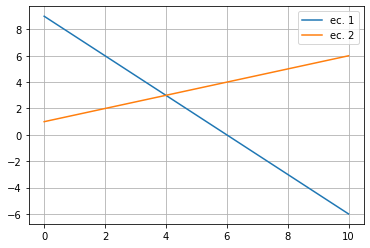

In [8]:
# Gráfica
plt.figure()                    # Las gráficas siempre inician con este comando
plt.plot(x, y1, label='ec. 1')  # Grafica la primera recta
plt.plot(x, y2, label='ec. 2')  # Grafica la segunda recta
plt.legend()                    # Muestra leyendas
plt.grid()                      # Muestra grilla
plt.show()                      # Imprime la gráfica


Ver: [01-grafica_basica.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/01-grafica_basica.py)

**Implementándolo como una función**

Se puede implementar una función para resolver gráficamente cualquier sistema de 2x2 como este:

De la ecuación general de las rectas:

$ax + by = c$

$dx + ey = f$

Se despeja la $y$, de tal manera que:

$y_1 = \frac{c - ax}{b}$

$y_2 = \frac{f - dx}{e}$  

In [9]:
# Importación de librerías.
import matplotlib.pyplot as plt
import numpy as np

def graficar_rectas(a, b, c, d, e, f):
    ''' 
        Grafica dos rectas a partir de los parámetros a, b, c, d, e, f.
        Donde:
        ax + by = c
        dx + ey = f
    '''
    x = np.array([0, 10])  # Definición de puntos de evaluación.
    y1 = (c - a*x)/b
    y2 = (f - d*x)/e
    
    plt.figure()
    plt.plot(x, y1, label=f"{a}$x$+{b}$y$={c}")  # Grafica la primera recta
    plt.plot(x, y2, label=f"{d}$x$+{e}$y$={f}")  # Grafica la segunda recta
    plt.legend()  # Muestra leyendas
    plt.grid()    # Muestra grilla
    plt.show()    # Imprime la gráfica


Con este método se pueden identificar 4 posibles tipos de resultados:
- Sistema con una única solución.
- Sistema sin solución.
- Sistema con infinitas soluciones.
- Sistema mal condicionado.

**Nota**: Los ejemplos fueron adaptados de la sección 9.1.1. de Chapra séptima edición.

In [10]:
# Sistema con una única solución

# Primera ecuación
a = 3
b = 2 
c = 18
# Segunda ecuación
d = -1
e =  2
f =  2


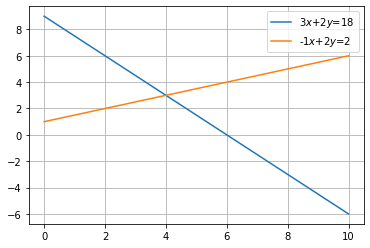

In [11]:
graficar_rectas(a, b, c, d, e, f)


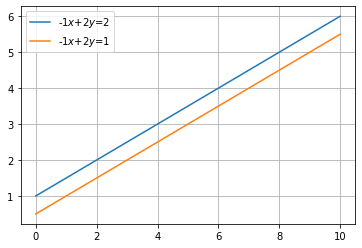

In [12]:
# Sistema sin solución.

# Primera ecuación
a = -1
b =  2 
c =  2
# Segunda ecuación
d = -1
e =  2
f =  1

graficar_rectas(a, b, c, d, e, f)


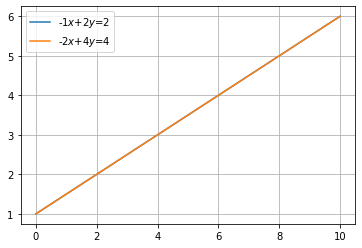

In [13]:
# Sistema con infinitas soluciones.

# Primera ecuación
a = -1
b =  2 
c =  2
# Segunda ecuación
d = -2
e =  4
f =  4

graficar_rectas(a, b, c, d, e, f)


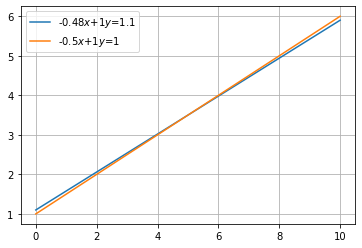

In [14]:
# Sistema mal condicionado.

# Primera ecuación
a = -2.4/5
b =  1 
c =  1.1
# Segunda ecuación
d = -1/2
e =  1
f =  1

graficar_rectas(a, b, c, d, e, f)


¿Qué ocurre si se sistematiza la solución de este tipo de sistema de ecuaciones 2x2?

$a x + b y = c$   (1)\
$d x + e y = f$   (2)

De (1) se despeja x y se reemplaza en (2):\
$x = \frac{c - b y}{a}$

Obteniendo:\
$d (\frac{c - b y}{a}) + e y = f$

Se despeja $y$:\
$y_{sol}=\frac{a f - c d}{a e - bd}$

Luego, reemplazando $y_{sol}$ en (1), se obtiene:
$x_{sol}=\frac{c e - bf}{a e - bd}$


In [15]:
# NO ES NECESARIO APRENDER NADA DE ESTAS LÍNEAS POR EL MOMENTO
# El procedimiento matemático anterior se puede hacer con el siguiente código.
import sympy as sp


In [16]:
x, y, a, b, c, d, e, f = sp.symbols('x, y, a, b, c, d, e, f')


In [17]:
# Estas dos líneas hacen lo mismo que la anterior, para los dos primeras variables.
x = sp.symbols('x')
y = sp.symbols('y')


In [18]:
# Se presentan las ecuaciones igualadas a cero.
ec_1 = a*x + b*y -c
ec_2 = d*x + e*y -f


In [19]:
x_1 = sp.solve(ec_1, x)[0]    # Se despeja de la ec_1 la variable x, se pone [0] porque se llama la primera solución.
ec_2 = ec_2.subs(x, x_1)      # Se sustituye en la ecuación ec_2 el valor de x por el obtenido en x_1.
y_sol = sp.solve(ec_2, y)[0]  # Se despeja de la nueva ecuación ec_2 el valor de y (el itercepto en y).


In [20]:
# Para hallar el intercepto en x, solo se debe sustituir en la ecuación ec_1 con 
# el intercepto en y hallado, y despejar.
x_sol = sp.solve(ec_1.subs(y, y_sol), x)[0]


In [21]:
x_sol  # Punto en x de la solución 2x2.


(-b*f + c*e)/(a*e - b*d)

In [22]:
y_sol  # Punto en y de la solución 2x2.


(a*f - c*d)/(a*e - b*d)

Teniendo en cuenta esto, qué ocurre si se crea una función que arroje esta solución:



In [23]:
def sol_2x2(a, b, c, d, e, f):
    '''
        Solucionador básico de ecuaciones 2x2 a partir de los parámetros a, b, c, d, e, f.
        Donde:
        ax + by = c
        dx + ey = f
    '''
    x = (-b*f + c*e)/(a*e - b*d)  # Solución de x obtenida a mano.
    y = (a*f - c*d)/(a*e - b*d)   # Solución de y obtenida a mano.
    
    return x, y


In [24]:
# Sistema con una única solución
# Primera ecuación
a = 3
b = 2 
c = 18
# Segunda ecuación
d = -1
e =  2
f =  2

sol_2x2(a, b, c, d, e, f)


(4.0, 3.0)

In [25]:
# Sistema sin solución.
# ¿Qué resultado saldrá? Si es error ¿cuál?
# Primera ecuación
a = -1
b =  2 
c =  2
# Segunda ecuación
d = -1
e =  2
f =  1

sol_2x2(a, b, c, d, e, f)


ZeroDivisionError: division by zero

In [ ]:
#x = (-b*f + c*e)/(a*e - b*d)  # Solución de x obtenida a mano.
#y = (a*f - c*d)/(a*e - b*d)   # Solución de y obtenida a mano.



In [26]:
# Denominador: Sin solución
(a*e - b*d)


0

In [27]:
# Numerador 1: Sin solución
(-b*f + c*e)


2

In [28]:
# Numerador 2: Sin solución
(a*f - c*d)


1

In [29]:
# Sistema con infinitas soluciones.

# Primera ecuación
a = -1
b =  2 
c =  2
# Segunda ecuación
d = -2
e =  4
f =  4

sol_2x2(a, b, c, d, e, f)


ZeroDivisionError: division by zero

In [30]:
#x = (-b*f + c*e)/(a*e - b*d)  # Solución de x obtenida a mano.
#y = (a*f - c*d)/(a*e - b*d)   # Solución de y obtenida a mano.


In [31]:
# Denominador: infinitas soluciones.
(a*e - b*d)


0

In [32]:
# Numerador 1: infinitas soluciones.
(-b*f + c*e)


0

In [33]:
# Numerador 2: infinitas soluciones.
(a*f - c*d)


0

In [34]:
# Sistema mal condicionado v1.

# Primera ecuación
a = -2.49999999999999/5  # Qué pasa si se ponen más o menos 9.
b =  1 
c =  1.000000000000001    # Qué pasa si se ponen más o menos 0.
# Segunda ecuación
d = -1/2
e =  1
f =  1

sol_2x2(a, b, c, d, e, f)


(0.5405405405405406, 1.2702702702702702)

In [35]:
# Sistema mal condicionado v2.

# Primera ecuación
a = -2.4999999999999999/5
b =  1 
c =  1.0000000000000001
# Segunda ecuación
d = -1/2
e =  1
f =  1

sol_2x2(a, b, c, d, e, f)


ZeroDivisionError: float division by zero

**Pregunta de clase**

¿Cómo diferenciar el 'ZeroDivisionError' de infinitas soluciones y de ninguna solución?\
Recomendación: revisar los valores $(a e - b d)$, $(-b f + c e)$ y $(a f - c d)$.

**No tiene solución** 
- El denominador es cero.

**Infinitas soluciones**
- El denominador y el numerador son cero.

In [36]:
x = (-b*f + c*e)/(a*e - b*d)  # Solución de x obtenida a mano.
y = (a*f - c*d)/(a*e - b*d)   # Solución de y obtenida a mano.


ZeroDivisionError: float division by zero

Un solucionador de ecuaciones mejorado, teniendo en cuenta las posibles causas de error:


In [37]:
def sol_2x2_mejorado(a, b, c, d, e, f):
    '''
        Solucionador básico de ecuaciones 2x2 a partir de los parámetros a, b, c, d, e, f.
        Donde:
        ax + by = c
        dx + ey = f
    '''
    # Condición del denominador.
    if (a*e - b*d) == 0:
        # Condición del numerador.
        if (-b*f + c*e)==0 and (a*f - c*d)==0:
            solucion = 'Infinitas soluciones'
        else:
            solucion = 'No tiene solución'
    else:     
        x = (-b*f + c*e)/(a*e - b*d)  # Solución de x obtenida a mano.
        y = (a*f - c*d)/(a*e - b*d)   # Solución de y obtenida a mano.
        solucion = (x, y)

    return solucion


In [38]:
# Ejemplo 1
a, b, c, d, e, f = 3, 2, 18, -1, 2, 2

sol_2x2_mejorado(a, b, c, d, e, f)


(4.0, 3.0)

In [39]:
# Ejemplo 2
a, b, c, d, e, f = -1, 2, 2, -1, 2, 1

sol_2x2_mejorado(a, b, c, d, e, f)


'No tiene solución'

In [40]:
# Ejemplo 3
a, b, c, d, e, f = -1, 2, 2, -2, 4, 4

sol_2x2_mejorado(a, b, c, d, e, f)


'Infinitas soluciones'

In [41]:
# Ejemplo 4
# Si se ponen nueves o ceros se puede obtener cualquiera de los 3 posibles resultados.
a, b, c, d, e, f = -2.4999999999999/5, 1, 1.0000000000001, -1/2, 1, 1  

sol_2x2_mejorado(a, b, c, d, e, f)


(5.0, 3.5)

Ver: [02-solucion_sistemas_de_ecuaciones_lineales_2x2.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/02-solucion_sistemas_de_ecuaciones_lineales_2x2.py)

### Regla de Cramer

Dado un sistema de ecuaciones de 3 x 3:

$a_{11}x_{1}+a_{12}x_{2}+a_{13}x_{3}=b_{1}$\
$a_{21}x_{1}+a_{22}x_{2}+a_{23}x_{3}=b_{2}$\
$a_{31}x_{1}+a_{32}x_{2}+a_{33}x_{3}=b_{3}$

Se puede expresar como:

$\underline{\underline{A}}$  $\underline{X}=\underline{B}$, en donde:

$
\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}
\begin{bmatrix}
x_{1}  \\
x_{2}  \\
x_{3} 
\end{bmatrix}
=
\begin{bmatrix}
b_{1}  \\
b_{2}  \\
b_{3} 
\end{bmatrix}$

La solución $i$ se obtiene al dividir el reemplazo de la columna $i$ con el vector $\underline{B}$ entre el determinante de la matriz. Es decir, la solución **explícita del sistema** de 3 x 3 es:

$x_1=\frac{
\left|
\begin{array}{ccc}
b_{1} & a_{12} & a_{13}\\
b_{2} & a_{22} & a_{23}\\
b_{3} & a_{32} & a_{33}
\end{array}
\right|
}
{|\underline{\underline{A}}|}
$,
$x_2=\frac{
\left|
\begin{array}{ccc}
a_{11} & b_{1} & a_{13}\\
a_{21} & b_{2} & a_{23}\\
a_{31} & b_{3} & a_{33}
\end{array}
\right|
}
{|\underline{\underline{A}}|}
$,
$x_3=\frac{
\left|
\begin{array}{ccc}
a_{11} & a_{12} & b_{1}\\
a_{21} & a_{22} & b_{2}\\
a_{31} & a_{32} & b_{3}
\end{array}
\right|
}
{|\underline{\underline{A}}|}
$.

Donde $|\underline{\underline{A}}|$ es el determinante de la matriz A. Por lo que aparece el concepto de singularidad de un sistema y **matriz singular**, refiriéndose a aquellos casos en los que el determinante es 0. Los sistemas singulares se caracterizan por **no** presentar una única solución.


A continuación, se crea un función recursiva para hallar el determinante de una matriz. La función se basa en la siguiente fuente https://www.mycompiler.io/view/IVBmA7d

**¿Cuál es el determinante de una matriz 2x2?**


In [42]:
# Se definen 4 variables simbólicas de la matriz de 2x2
a, b, c, d = sp.symbols('a b c d')


In [43]:
b

b

In [44]:
# Se crea la matriz M
A = [
     [a, b],
     [c, d],
           ]

A = sp.Matrix(A)


In [45]:
A


Matrix([
[a, b],
[c, d]])

In [46]:
A.det()


a*d - b*c

La función recursiva es:

**(Se debe estudiar detalladamente su funcionamiento)**

In [47]:
def determinante(M):
    '''
        Función recursiva
        Cálculo del determinante de una matriz en forma de lista de listas.
    '''
    if len(M) != len(M[0]):  # Verificación si es cuadrada.
        det = 'La matriz no es cuadrada'
        return det
    det = 0  # Variable de acumulación del determinante.
    if len(M)==2:  # Caso 2x2
        det = M[0][0]*M[1][1] - M[1][0]*M[0][1]
        return det
    else:
        for i in range(len(M)):
            M2 = [f[:] for f in M]  # Se crea una copia
            M2.remove(M[0])
            for j in range(len(M2)):
                M2[j] = M2[j][0:i] + M2[j][i+1:]  # Matriz de cofactores
            det += (-1)**(i)*M[0][i]*determinante(M2)
        return det


Códigos auxiliares de la función, para su fácil visualización

In [48]:
# Si se define una matriz A
A = [
     [1, 2],
     [3, 4],
           ]


In [49]:
# La linea:
B = [f[:] for f in A]
# Crea una copia profunda de la lista de listas.


In [50]:
# Al modificar algo en B, no se modifica en A.
B[0][0] = 0


In [51]:
B  # Matriz B modificada.


[[0, 2], [3, 4]]

In [52]:
A  # La matriz A no se modifica.


[[1, 2], [3, 4]]

In [53]:
# Pero, si simplemente se hace:
B = A


In [54]:
# Al modificar algo en B, se modifica en A.
B[0][0] = 0


In [55]:
B


[[0, 2], [3, 4]]

In [56]:
A


[[0, 2], [3, 4]]

Ejemplo de aplicación de la función recursiva del determinante.

In [57]:
# Ejemplo 1 del determinante
M = [[ 2,  1, -1, 2],
     [ 4,  5, -3, 6],
     [-2,  5, -2, 6],
     [ 4, 10, -4, 8]]

determinante(M)


-8

In [58]:
# Ejemplo 2 del determinante
M = [[ 2,  1,  4, -1],
     [ 3, -2,  1,  0],
     [ 5,  1, -3,  2],
     [-1,  3,  3, -1]]

determinante(M)


0

In [59]:
# Ejemplo 3 del determinante
M = [[-9,  7,  2,  5,  7],
     [ 5,  3, -2,  2, -6],
     [ 2, -6, -5, -7, -8],
     [-2,  4, -2, -2, -6]]

determinante(M)


'La matriz no es cuadrada'

Ver: [03-calculo_determinante_f_recursiva.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/03-calculo_determinante_f_recursiva.py)

Se crea una función que solucione sistemas de ecuaciones de nxn con n>1 mediante la regla de Cramer y usando el [teorema de Laplace](https://es.wikipedia.org/wiki/Teorema_de_Laplace)

In [60]:
# Esta función siempre debe ir acompañada de la función
# 'determinante', previamente definida.
def sol_cramer(A, B):
    '''
        Solución de un sistema AX=B, donde:
        A: coeficientes constantes, se ingresa como una lista de listas.
        X: incógnitas (o su equivalente 'sol')
        B: constantes, se ingresa como una lista.
    '''
    # Se consideran las posibles causas de error.
    # Las filas y las columnas tienen diferente tamaño.
    if len(A) != len(A[0]):  
        sol = 'La matriz de A no es cuadrada.'
    # El número de ecuaciones (filas de A) no coincide con la cant. de constantes.
    elif len(A) != len(B):   
        sol = 'Los tamaños de A y B no coinciden.'
    # El sistema no puede ser de una solo ecuación.
    elif len(A)== 1:
        sol = 'Se debe tener un sistema de mínimo 2x2'
    # Demás casos.
    else:
        det_A = determinante(A)
        # Sistema singular, ya sea por inf. soluciones o por ninguna solución.
        if det_A == 0:
            sol = 'Sistema singular'
        # Caso donde hay una solución única.
        else:
            # Cálculos.
            sol = []  # Reserva de espacio de memoria.
            for j in range(len(A)):
                A2 = [f[:] for f in A]  # Se crea una copia.
                for i in range(len(A)):
                    A2[i][j] = B[i]                     
                sol += [determinante(A2)/det_A]
    return sol 


In [61]:
# Ejemplo 1.
A1 = [[ 2,  1,  4, -1],
      [ 3, -2,  1,  0],
      [ 5,  1, -3,  2],
      [-1,  3,  3, -1]]

B1 = [1, -1, 4, 3]


In [62]:
sol_cramer(A1, B1)


'Sistema singular'

In [63]:
# Ejemplo 2.
A2 = [[-9,  7,  2,  5,  7],
      [ 5,  3, -2,  2, -6],
      [ 2, -6, -5, -7, -8],
      [-2,  4, -2, -2, -6]]

B2 = [1, -1, 4, 3]


In [64]:
sol_cramer(A2, B2)


'La matriz de A no es cuadrada.'

In [65]:
# Ejemplo 3 (fuente: http://anacrisstina-18.blogspot.com/2013/11/metodo-de-cramer-4x4.html)
A3 = [[-1, -1,  6,  9],
      [-5,  5, -3,  6],
      [ 7, -3,  5, -6],
      [ 3, -3, -2,  3]]

B3 = [-29, -54, 38, 41]


In [66]:
sol_cramer(A3, B3)


[4.0, -8.0, -4.0, -1.0]

**Pregunta de clase**

A pesar de que la regla de Cramer tiene soluciones explícitas ¿por qué no se usa como método general de solución de sistemas de ecuaciones lineales?

Si se aumenta el tamaño de la matriz de coeficientes, la cantidad de operaciones se eleva potencialmente.

A continuación se evalúa el costo computacional del cálculo de determinantes (mediante el teorema de Laplace) de matrices de diferentes tamaños.

In [67]:
# Se crea una matriz aleatoria de nxn
def crear_matriz_cuadrada_aleatoria(n):
    '''
        Función para crear una matriz aleatoria de nxn con valores entre -10 y 10.
    '''
    M =[]               # Reserva de espacio.
    for i in range(n):
        M += [[]]       # Se crea una nueva fila.
        for j in range(n):
            M[i] += [int(np.random.randint(-10, 10))]  # Se agrega un elemento aleatorio.
    return M


In [68]:
crear_matriz_cuadrada_aleatoria(7)


[[5, 9, -2, 7, 9, -2, 4],
 [-10, -6, -1, 0, 7, 3, 5],
 [-1, -1, 5, -6, -6, 0, 5],
 [0, -6, -5, -9, 1, -7, -6],
 [-1, -6, 5, -6, -9, -4, 0],
 [-1, -3, -1, -4, -4, 4, 0],
 [-4, -6, -7, -1, -2, -1, 0]]

In [69]:
# Se crea un vector columna de tamaño n.
def crear_vector_aleatorio(n):
    '''
        Función para crear un vector de tamaño nx1 con valores entre -5 y 5.
    '''
    B =[]                                          # Reserva de espacio.
    for i in range(n):
        B += [int(np.random.randint(-5, 5))]     # Se agrega un elemento aleatorio.
    return B


In [70]:
crear_vector_aleatorio(7)


[3, 3, 0, 4, -2, 0, 1]

In [71]:
import time
tiempos = []  # Espacio para almacenar el tiempo de cálculo.

# Se evalúa el tiempo de cálculo del determinante entre n=2 y n=10.
for i in range(2, 11):
    M = crear_matriz_cuadrada_aleatoria(i)  # Función de creación de matriz.
    inicio = time.time()                    # Tiempo de incio.
    determinante(M)                         # Función de cálculo del determinante de matrices.
    fin = time.time()                       # Tiempo de fin.
    tiempos += [fin-inicio]


In [72]:
tiempos


[0.0,
 0.0,
 0.0,
 0.0,
 0.001997232437133789,
 0.020130157470703125,
 0.10401654243469238,
 0.6674647331237793,
 5.911634683609009]

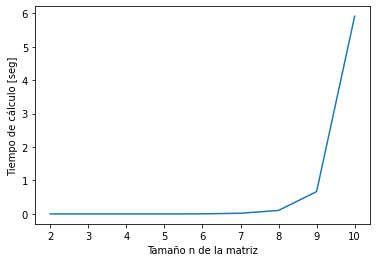

In [73]:
# Gráfica de costo computacional.
plt.figure()                           # Expresión inicial de toda gráf
plt.plot(list(range(2, 11)), tiempos)
plt.xlabel('Tamaño n de la matriz')    # Título del eje x.
plt.ylabel('Tiempo de cálculo [seg]')  # Título del eje y.
plt.show()                             # Imprime la gráfica.


In [74]:
# Un ejemplo adicional.
n = 7
A1 = crear_matriz_cuadrada_aleatoria(n)
B1 = crear_vector_aleatorio(n)


In [75]:
A1


[[7, 6, -1, 6, 2, -5, 7],
 [4, -8, -7, 5, 6, 2, 7],
 [7, -5, -3, 0, -5, -9, -10],
 [-2, 5, 1, -7, 3, 6, 3],
 [-1, -4, -8, 3, -2, -9, -1],
 [7, 3, -5, -10, -6, -10, -5],
 [4, 4, 6, 0, -5, -3, 6]]

In [76]:
B1


[-1, 1, 2, 2, 4, 3, -5]

In [77]:
sol_cramer(A1, B1)


[-0.934656396401575,
 -1.4412429703292808,
 2.579101160195058,
 -1.8074516904741376,
 4.469955642418494,
 -3.599148296113203,
 0.09688730491765585]

Ver: [04-costo_computacional_teorema_laplace.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/04-costo_computacional_teorema_laplace.py)

Ver: [05-regla_cramer.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/05-regla_cramer.py)

**Resumen de comandos usados**
- definición de funciones con 'def', 'return'
- if, elif, else
- funciones recursivas
- L.remove() para listas.
- np.random.randint()
- time.time()
- ciclo 'for'
- range()
- plt.figure()
- plt.plot(\_\_, \_\_) 
- plt.legend()
- plt.grid()
- plt.show()

